# Amooora Text Classification

Nesse notebook vamos explorar o modelo disponível no Huggingface [bert-base-therapist-topic-classification-eng](https://huggingface.co/AIPsy/bert-base-therapist-topic-classification-eng)

## Importing packages

In [ ]:
!pip install transformers

In [ ]:
import pandas as pd
from transformers import pipeline

## Loading data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Load entire Dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/amooora/raw_data/text_and_topics.csv', keep_default_na=False)
df.head()

,combined_preprocessed,answered_percent,text_length,topic_0_from_five,topic_1_from_five,topic_2_from_five,topic_3_from_five,topic_4_from_five,topic_0_from_two,topic_1_from_two
0,would love think kind intellectual either dumb...,100.0,1565,0.905500,0.023574,0.023639,0.023778,0.023509,0.271588,0.728412
1,chef mean workaholic love cook regardless whet...,60.0,815,0.027683,0.339134,0.027590,0.578125,0.027468,0.446532,0.553468
2,im ashamed much write public text online date ...,90.0,3728,0.914891,0.021284,0.021307,0.021207,0.021311,0.280111,0.719889
3,work library go school read thing write old de...,70.0,330,0.045781,0.045620,0.817402,0.045673,0.045524,0.330528,0.669472
4,hey hows go currently vague profile know come ...,50.0,496,0.031946,0.031976,0.872147,0.032119,0.031812,0.450953,0.549047


## Test Bert model

### Defining labels

In [ ]:
id2label = {0: 'Time Up and Future Meetings',
            1: 'Complex Emotions Toward Him',
            2: 'Desires and Disappointments',
            3: 'Personal Growth and Decision-Making',
            4: 'Self-Acceptance and Relationships',
            5: 'Understanding and Confronting Fear',
            6: 'See and Understanding Conversations',
            7: 'Clarifying Meaning and Intent',
            8: 'Desire to Escape and Leave',
            9: 'Uncertainty and Understanding Issues',
            10: 'Open Conversation and Sharing',
            11: 'Exploring Emotional Hurt and Bitterness',
            12: 'Guilt and Self-Blame Dynamics',
            13: 'Dynamics of Meaningful Relationships',
            14: 'Struggles and Desires in Learning',
            15: 'Gender Roles and Relationships',
            16: 'Struggles with Personal Change',
            17: 'Complex Mother-Sibling Relationships',
            18: 'Voices and Perception of Sound',
            19: 'Difficulties and Emotional Burdens',
            20: 'Fear and Reflection on Aging',
            21: 'Emotions of Crying and Tears',
            22: 'Father-Child Relationships and Authority',
            23: 'Possibilities and Potential Outcomes',
            24: 'Inner Struggle and Helplessness',
            25: 'Pursuing Meaningful Personal Goals',
            26: 'Job Anxiety and Self-Reflection',
            27: 'Marriage Anxiety and Dependence',
            28: 'Expressions of Anger and Frustration',
            29: 'Nurturing the inner child',
            30: 'Therapy and Father Relationships',
            31: 'Expressions of Happiness and Joy',
            32: 'Revisiting the Past Together',
            33: 'Drinking Habits and Concerns',
            34: 'Managing and Increasing Energy Levels',
            35: 'Safety and Self-Protection Strategies',
            36: 'Understanding Depression and Its Roots'}


### Bert Pipeline

In [ ]:
pipe = pipeline("text-classification", model="AIPsy/bert-base-therapist-topic-classification-eng", truncation=True)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/2.40k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.27k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

Device set to use cuda:0


In [ ]:
text = df.iloc[213]
text

,213
combined_preprocessed,might make little less random together woman a...
answered_percent,100.0
text_length,2473
topic_0_from_five,0.916469
topic_1_from_five,0.020989
topic_2_from_five,0.020861
topic_3_from_five,0.020864
topic_4_from_five,0.020816
topic_0_from_two,0.249386
topic_1_from_two,0.750614


In [ ]:
pipe(text.combined_preprocessed)

[{'label': 'LABEL_31', 'score': 0.25077134370803833}]

In [ ]:
texts = list(df.combined_preprocessed)

In [ ]:
texts

['would love think kind intellectual either dumbest smart guy smartest dumb guy cant say tell difference love talk idea concept forge odd metaphor instead recite cliche like simularities friend mine house underwater salt mine favorite word salt way weird choice know thing life better metaphor seek make little better everyday productively lazy way get tire tie shoe consider hire five year old would probably tie shoe decide wear leather shoe dress shoe love really serious really deep conversation really silly stuff will snap light hearted rant kiss dont funny able make laugh able bend spoon mind telepathically make smile still work love life cool let wind blow extra point read guess favorite video game hint give yet lastly good attention span currently work international agent freight forward company import export domestic know work online class try better free time perhaps hour worth good book video game lazy sunday make people laugh rant good salt find simplicity complexity complexity 

In [ ]:
type(texts)

list

In [ ]:
pipe(texts[10])

[{'label': 'LABEL_31', 'score': 0.39572444558143616}]

In [ ]:
%%time
results = pipe(texts)

CPU times: user 17min 46s, sys: 1.25 s, total: 17min 48s
Wall time: 17min 45s


In [ ]:
results

[{'label': 'LABEL_0', 'score': 0.44948020577430725},
 {'label': 'LABEL_34', 'score': 0.43134209513664246},
 {'label': 'LABEL_18', 'score': 0.2989632785320282},
 {'label': 'LABEL_14', 'score': 0.17681501805782318},
 {'label': 'LABEL_31', 'score': 0.6075142621994019},
 {'label': 'LABEL_31', 'score': 0.9311943054199219},
 {'label': 'LABEL_31', 'score': 0.4925578534603119},
 {'label': 'LABEL_31', 'score': 0.6827707886695862},
 {'label': 'LABEL_31', 'score': 0.813604474067688},
 {'label': 'LABEL_31', 'score': 0.21826480329036713},
 {'label': 'LABEL_31', 'score': 0.39572444558143616},
 {'label': 'LABEL_31', 'score': 0.6960838437080383},
 {'label': 'LABEL_6', 'score': 0.8586026430130005},
 {'label': 'LABEL_6', 'score': 0.9729386568069458},
 {'label': 'LABEL_31', 'score': 0.4729682207107544},
 {'label': 'LABEL_26', 'score': 0.7710307836532593},
 {'label': 'LABEL_34', 'score': 0.3016201853752136},
 {'label': 'LABEL_0', 'score': 0.20549938082695007},
 {'label': 'LABEL_0', 'score': 0.476918160915

In [ ]:
type(results)

list

In [ ]:
result_one = results[1]

In [ ]:
id2label[int(result_one['label'].split('_')[-1])]

'Managing and Increasing Energy Levels'

In [ ]:
labels = []
for result in results:
  labels.append(id2label[int(result['label'].split('_')[-1])])

In [ ]:
labels

['Time Up and Future Meetings',
 'Managing and Increasing Energy Levels',
 'Voices and Perception of Sound',
 'Struggles and Desires in Learning',
 'Expressions of Happiness and Joy',
 'Expressions of Happiness and Joy',
 'Expressions of Happiness and Joy',
 'Expressions of Happiness and Joy',
 'Expressions of Happiness and Joy',
 'Expressions of Happiness and Joy',
 'Expressions of Happiness and Joy',
 'Expressions of Happiness and Joy',
 'See and Understanding Conversations',
 'See and Understanding Conversations',
 'Expressions of Happiness and Joy',
 'Job Anxiety and Self-Reflection',
 'Managing and Increasing Energy Levels',
 'Time Up and Future Meetings',
 'Time Up and Future Meetings',
 'Expressions of Happiness and Joy',
 'Time Up and Future Meetings',
 'Expressions of Happiness and Joy',
 'Expressions of Happiness and Joy',
 'Expressions of Happiness and Joy',
 'Voices and Perception of Sound',
 'Expressions of Happiness and Joy',
 'Time Up and Future Meetings',
 'Expressions 

In [ ]:
df = pd.DataFrame(results)

In [ ]:
df.label = df.label.apply(lambda x: int(x.split('_')[-1]))

In [ ]:
df.head()

,label,score
0,0,0.449480
1,34,0.431342
2,18,0.298963
3,14,0.176815
4,31,0.607514


In [ ]:
df['real_label'] = df.label.apply(lambda x: id2label[x])

In [ ]:
df.head()

,label,score,real_label
0,0,0.449480,Time Up and Future Meetings
1,34,0.431342,Managing and Increasing Energy Levels
2,18,0.298963,Voices and Perception of Sound
3,14,0.176815,Struggles and Desires in Learning
4,31,0.607514,Expressions of Happiness and Joy


## Saving to CSV

In [ ]:
df.to_csv(
    '/content/drive/MyDrive/Colab Notebooks/amooora/raw_data/text_labeled_bert.csv',
    index=False,
    columns=df.columns
)

## Exploring labels distribution

In [ ]:
df.sort_values(by='score', ascending=False)

,label,score,real_label
49061,0,0.990169,Time Up and Future Meetings
49399,0,0.989761,Time Up and Future Meetings
56191,0,0.989670,Time Up and Future Meetings
52658,0,0.989649,Time Up and Future Meetings
4996,0,0.989497,Time Up and Future Meetings
...,...,...,...
26185,16,0.092591,Struggles with Personal Change
47009,34,0.090673,Managing and Increasing Energy Levels
8480,35,0.089561,Safety and Self-Protection Strategies
11661,29,0.086142,Nurturing the inner child


In [ ]:
label_counts = df.iloc[:, 0].value_counts()
label_counts

,count
label,
31,29047
0,10407
34,4803
6,2886
13,1684
20,1468
26,1423
33,1392
14,1368


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-49-6e4b6262d76d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")


<Axes: xlabel='label'>

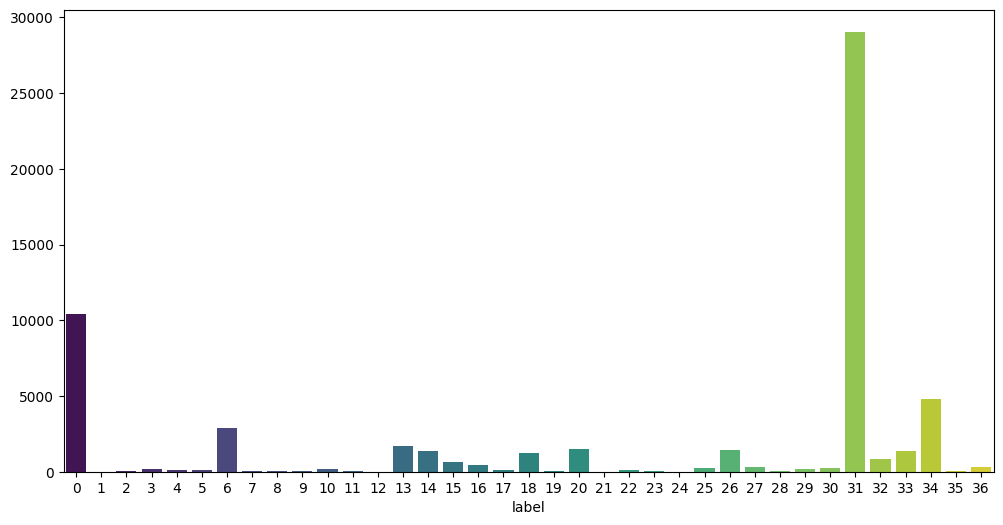

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")

<Axes: xlabel='real_label', ylabel='Count'>

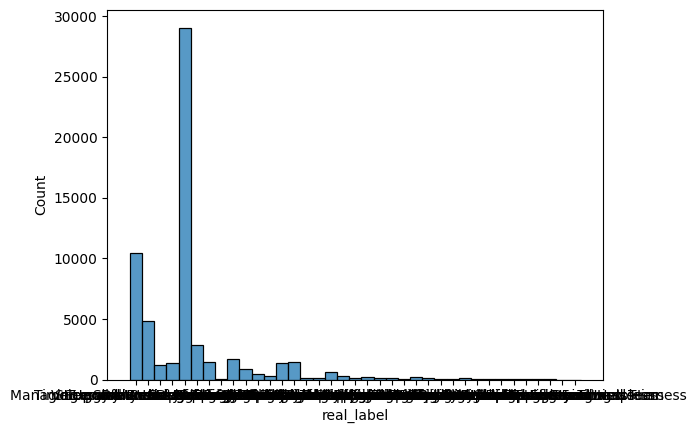

In [ ]:
sns.histplot(data=df, x='real_label')

## Packaging into function

In [ ]:
pipe = pipeline("text-classification", model="AIPsy/bert-base-therapist-topic-classification-eng", truncation=True)


Device set to use cuda:0


In [ ]:
def compute_bert_labels(texts):
  results = pipe(texts)
  labels = []
  for result in results:
    labels.append(id2label[int(result['label'].split('_')[-1])])

  df = pd.DataFrame(results)
  df.label = df.label.apply(lambda x: int(x.split('_')[-1]))
  df['real_label'] = df.label.apply(lambda x: id2label[x])
  return df


## Let's try out another model

In [ ]:
!pip install xformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.4/43.4 MB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 34.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 768.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 14.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

### Load model from HuggingFace

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("WebOrganizer/TopicClassifier-NoURL")
model = AutoModelForSequenceClassification.from_pretrained(
    "WebOrganizer/TopicClassifier-NoURL",
    trust_remote_code=True,
    use_memory_efficient_attention=False)

tokenizer_config.json:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/695 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/2.68k [00:00<?, ?B/s]

configuration.py:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/WebOrganizer/TopicClassifier-NoURL:
- configuration.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling.py:   0%|          | 0.00/59.0k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/WebOrganizer/TopicClassifier-NoURL:
- modeling.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors:   0%|          | 0.00/550M [00:00<?, ?B/s]

### Get two text to try out

In [ ]:
text_one = df.iloc[0:2].combined_preprocessed

In [ ]:
text_one.values

array(['would love think kind intellectual either dumbest smart guy smartest dumb guy cant say tell difference love talk idea concept forge odd metaphor instead recite cliche like simularities friend mine house underwater salt mine favorite word salt way weird choice know thing life better metaphor seek make little better everyday productively lazy way get tire tie shoe consider hire five year old would probably tie shoe decide wear leather shoe dress shoe love really serious really deep conversation really silly stuff will snap light hearted rant kiss dont funny able make laugh able bend spoon mind telepathically make smile still work love life cool let wind blow extra point read guess favorite video game hint give yet lastly good attention span currently work international agent freight forward company import export domestic know work online class try better free time perhaps hour worth good book video game lazy sunday make people laugh rant good salt find simplicity complexity compl

### Call model to predict label

In [ ]:
inputs = tokenizer(list(text_one.values), return_tensors="pt", padding=True, truncation=True)
outputs = model(**inputs)

probs = outputs.logits.softmax(dim=-1)
print(probs.argmax(dim=-1))

tensor([7, 7])


### Get label predicted

In [ ]:
label_id = probs.argmax(dim=-1)

In [ ]:
label_id.tolist()

[7, 7]

### Read model labels

In [ ]:
model.config.id2label

{0: 'Adult',
 1: 'Art & Design',
 10: 'Food & Dining',
 11: 'Games',
 12: 'Health',
 13: 'History',
 14: 'Home & Hobbies',
 15: 'Industrial',
 16: 'Literature',
 17: 'Politics',
 18: 'Religion',
 19: 'Science & Tech.',
 2: 'Software Dev.',
 20: 'Software',
 21: 'Sports & Fitness',
 22: 'Transportation',
 23: 'Travel',
 3: 'Crime & Law',
 4: 'Education & Jobs',
 5: 'Hardware',
 6: 'Entertainment',
 7: 'Social Life',
 8: 'Fashion & Beauty',
 9: 'Finance & Business'}

### Predicted label for one text

In [ ]:
model.config.id2label[label_id.item()]

RuntimeError: a Tensor with 2 elements cannot be converted to Scalar

### Predicting all texts

criar funcao com os passos
e aplicar no for loop com iloc andando de chunksize em chunksize

Rodar O modelo e depois fazer um pca para criar menos topicos ao inves de 36


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

In [ ]:
# Load tokenizer and model once (outside the loop to save memory)
tokenizer = AutoTokenizer.from_pretrained("WebOrganizer/TopicClassifier-NoURL")
model = AutoModelForSequenceClassification.from_pretrained(
    "WebOrganizer/TopicClassifier-NoURL",
    trust_remote_code=True,
    use_memory_efficient_attention=False
)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
def compute_labels(texts):
    """Return the predicted label for multiple texts."""

    # Tokenize and predict
    inputs = tokenizer(texts, return_tensors="pt", padding=True, truncation=True, max_length=512)
    outputs = model(**inputs)

    # Convert logits to probabilities
    probs = outputs.logits.softmax(dim=-1)
    print(probs)
    # Get predicted labels
    predicted_labels = [model.config.id2label[label] for label in probs.argmax(dim=-1).tolist()]

    return predicted_labels


In [ ]:
%%time
# Load dataset in chunks
chunk_size = 500
chunks = pd.read_csv(
    '/content/drive/MyDrive/Colab Notebooks/amooora/raw_data/text_and_topics.csv',
    keep_default_na=False,
    chunksize=chunk_size)

# Store predictions
predictions = []

for chunk in chunks:
    texts = chunk["combined_preprocessed"].values.tolist()
    chunk_predictions = compute_labels(texts)
    predictions.extend(chunk_predictions)

KeyboardInterrupt: 